In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt

from torchvision import datasets, transforms

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(mnist, batch_size=64, shuffle=True)

In [3]:
class Generator(nn.Module):
    def __init__(self, latent_dim, num_classes, image_size):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim + num_classes, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, image_size),
            nn.Tanh()  # 출력 이미지 값의 범위를 [-1, 1]로 설정
        )

    def forward(self, noise, labels):
        input = torch.cat((noise, labels), 1) # 핵심 특징: noise와 labels를 합침
        return self.model(input)

In [4]:
class Discriminator(nn.Module):
    def __init__(self, num_classes, image_size):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(image_size + num_classes, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()  # 이진 분류를 위한 활성화 함수
        )

    def forward(self, img, labels):
        input = torch.cat((img, labels), 1) # 핵심 특징: 이미지와 labels를 합침
        return self.model(input)

In [5]:
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)  # Xavier 정규 분포 초기화
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)  # 바이어스는 0으로 초기화

In [6]:
def save_generated_images(generator, epoch, real_imgs, latent_dim, num_classes, device):
    
    noise = torch.randn(100, latent_dim).to(device)
    labels = torch.randint(0, num_classes, (100,)).to(device)
    labels_onehot = torch.zeros(100, num_classes).to(device)
    labels_onehot[range(100), labels] = 1

    gen_imgs = generator(noise, labels_onehot).view(-1, 1, 28, 28).detach().cpu()

    grid = torchvision.utils.make_grid(gen_imgs, nrow=10, normalize=True)
    plt.imshow(grid.permute(1, 2, 0).numpy())
    plt.title(f'Epoch {epoch}')
    plt.axis('off')
    plt.show()

In [7]:
# 하이퍼파라미터
latent_dim = 100
num_classes = 10
image_size = 28 * 28
lr = 0.0002
num_epochs = 200

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.set_float32_matmul_precision('high')


generator = Generator(latent_dim, num_classes, image_size).to(device)
discriminator = Discriminator(num_classes, image_size).to(device)

generator.apply(weights_init)
discriminator.apply(weights_init)

generator = torch.compile(generator, mode='default')
discriminator = torch.compile(discriminator, mode='default')


criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

print(next(generator.parameters()).device)
print(next(discriminator.parameters()).device)

cuda:0
cuda:0


Epoch [0/200] | D Loss: 0.0144 | G Loss: 8.7176


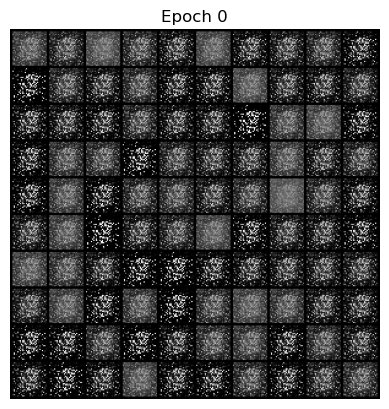

Epoch [1/200] | D Loss: 0.0787 | G Loss: 2.2901
Epoch [2/200] | D Loss: 0.0280 | G Loss: 5.3663
Epoch [3/200] | D Loss: 0.0940 | G Loss: 7.1656
Epoch [4/200] | D Loss: 0.0141 | G Loss: 5.9367
Epoch [5/200] | D Loss: 0.0184 | G Loss: 6.3368
Epoch [6/200] | D Loss: 0.0257 | G Loss: 6.6672
Epoch [7/200] | D Loss: 0.0210 | G Loss: 6.0725
Epoch [8/200] | D Loss: 0.0423 | G Loss: 5.3132
Epoch [9/200] | D Loss: 0.0327 | G Loss: 6.1529
Epoch [10/200] | D Loss: 0.0471 | G Loss: 3.8692


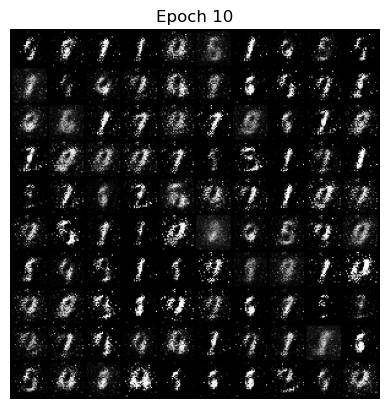

Epoch [11/200] | D Loss: 0.0316 | G Loss: 6.3264
Epoch [12/200] | D Loss: 0.0943 | G Loss: 3.4637
Epoch [13/200] | D Loss: 0.2622 | G Loss: 3.2515
Epoch [14/200] | D Loss: 0.1124 | G Loss: 6.7640
Epoch [15/200] | D Loss: 0.0771 | G Loss: 3.5456
Epoch [16/200] | D Loss: 0.1393 | G Loss: 5.2608
Epoch [17/200] | D Loss: 0.1663 | G Loss: 7.7555
Epoch [18/200] | D Loss: 0.0778 | G Loss: 4.9387
Epoch [19/200] | D Loss: 0.0817 | G Loss: 3.9681
Epoch [20/200] | D Loss: 0.0917 | G Loss: 4.1701


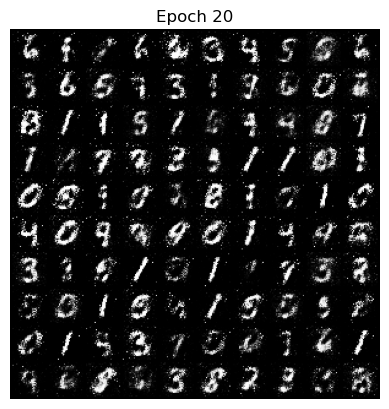

Epoch [21/200] | D Loss: 0.3539 | G Loss: 2.9673
Epoch [22/200] | D Loss: 0.1535 | G Loss: 4.6185
Epoch [23/200] | D Loss: 0.3134 | G Loss: 2.0746
Epoch [24/200] | D Loss: 0.1683 | G Loss: 4.7674
Epoch [25/200] | D Loss: 0.1029 | G Loss: 3.6823
Epoch [26/200] | D Loss: 0.2009 | G Loss: 3.5773
Epoch [27/200] | D Loss: 0.1751 | G Loss: 2.8704
Epoch [28/200] | D Loss: 0.2587 | G Loss: 4.1378
Epoch [29/200] | D Loss: 0.2178 | G Loss: 2.8928
Epoch [30/200] | D Loss: 0.2975 | G Loss: 3.2115


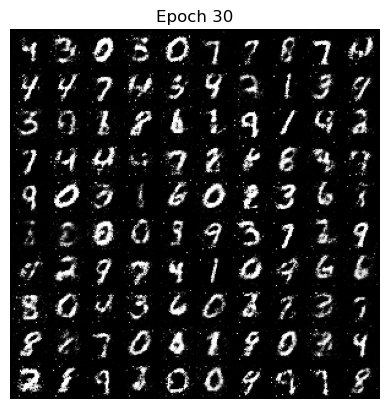

Epoch [31/200] | D Loss: 0.2087 | G Loss: 3.1283
Epoch [32/200] | D Loss: 0.3085 | G Loss: 2.3652
Epoch [33/200] | D Loss: 0.2944 | G Loss: 2.3291
Epoch [34/200] | D Loss: 0.2889 | G Loss: 2.8727
Epoch [35/200] | D Loss: 0.3416 | G Loss: 2.9392
Epoch [36/200] | D Loss: 0.4693 | G Loss: 1.3515
Epoch [37/200] | D Loss: 0.4192 | G Loss: 1.5403
Epoch [38/200] | D Loss: 0.2118 | G Loss: 2.7691
Epoch [39/200] | D Loss: 0.3151 | G Loss: 1.5997
Epoch [40/200] | D Loss: 0.3812 | G Loss: 1.4149


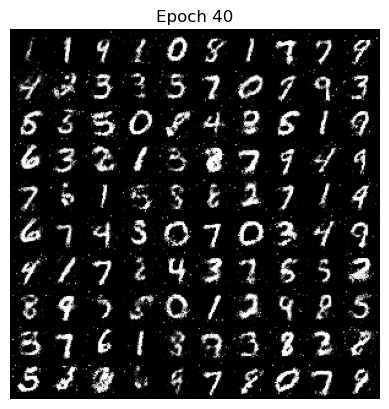

Epoch [41/200] | D Loss: 0.3666 | G Loss: 2.3873
Epoch [42/200] | D Loss: 0.3484 | G Loss: 1.7068
Epoch [43/200] | D Loss: 0.3463 | G Loss: 2.8797
Epoch [44/200] | D Loss: 0.3349 | G Loss: 2.6155
Epoch [45/200] | D Loss: 0.3910 | G Loss: 2.2045
Epoch [46/200] | D Loss: 0.3536 | G Loss: 1.8958
Epoch [47/200] | D Loss: 0.3238 | G Loss: 1.4137
Epoch [48/200] | D Loss: 0.4845 | G Loss: 1.8967
Epoch [49/200] | D Loss: 0.4322 | G Loss: 1.2188
Epoch [50/200] | D Loss: 0.5443 | G Loss: 2.4498


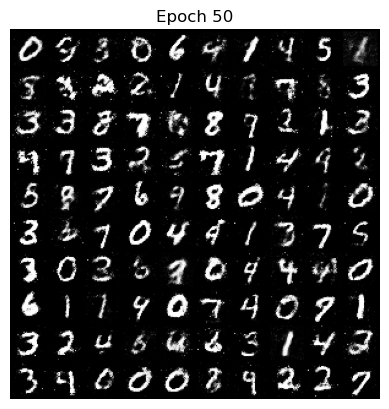

Epoch [51/200] | D Loss: 0.5085 | G Loss: 2.1261
Epoch [52/200] | D Loss: 0.4231 | G Loss: 1.5217
Epoch [53/200] | D Loss: 0.3944 | G Loss: 2.3398
Epoch [54/200] | D Loss: 0.4295 | G Loss: 2.0196
Epoch [55/200] | D Loss: 0.5181 | G Loss: 2.1989
Epoch [56/200] | D Loss: 0.5908 | G Loss: 1.1392
Epoch [57/200] | D Loss: 0.5372 | G Loss: 1.3488
Epoch [58/200] | D Loss: 0.3239 | G Loss: 1.5980
Epoch [59/200] | D Loss: 0.4399 | G Loss: 1.7410
Epoch [60/200] | D Loss: 0.5367 | G Loss: 1.6139


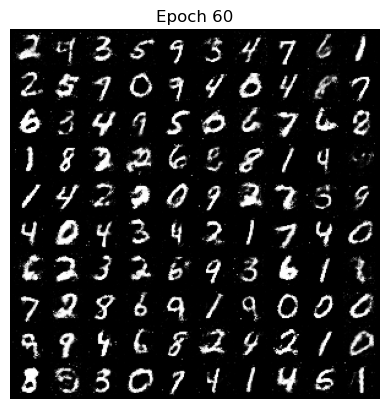

Epoch [61/200] | D Loss: 0.5497 | G Loss: 1.2842
Epoch [62/200] | D Loss: 0.3595 | G Loss: 1.3968
Epoch [63/200] | D Loss: 0.7616 | G Loss: 1.0443
Epoch [64/200] | D Loss: 0.4590 | G Loss: 1.4179
Epoch [65/200] | D Loss: 0.5239 | G Loss: 2.1089
Epoch [66/200] | D Loss: 0.5303 | G Loss: 0.9506
Epoch [67/200] | D Loss: 0.5770 | G Loss: 1.4018
Epoch [68/200] | D Loss: 0.4119 | G Loss: 1.3037
Epoch [69/200] | D Loss: 0.5087 | G Loss: 1.3800
Epoch [70/200] | D Loss: 0.5801 | G Loss: 1.7495


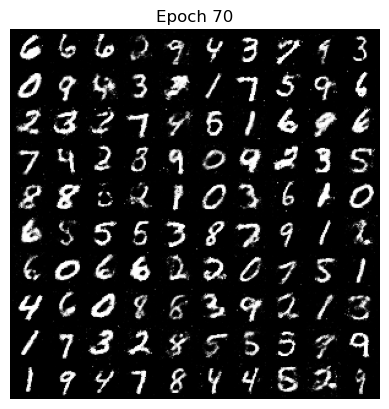

Epoch [71/200] | D Loss: 0.3725 | G Loss: 1.5656
Epoch [72/200] | D Loss: 0.4579 | G Loss: 1.1875
Epoch [73/200] | D Loss: 0.6125 | G Loss: 1.0663
Epoch [74/200] | D Loss: 0.5330 | G Loss: 1.2938
Epoch [75/200] | D Loss: 0.5721 | G Loss: 1.2388
Epoch [76/200] | D Loss: 0.4595 | G Loss: 1.3714
Epoch [77/200] | D Loss: 0.4459 | G Loss: 1.9045
Epoch [78/200] | D Loss: 0.4634 | G Loss: 1.5445
Epoch [79/200] | D Loss: 0.5318 | G Loss: 1.3683
Epoch [80/200] | D Loss: 0.4207 | G Loss: 1.8268


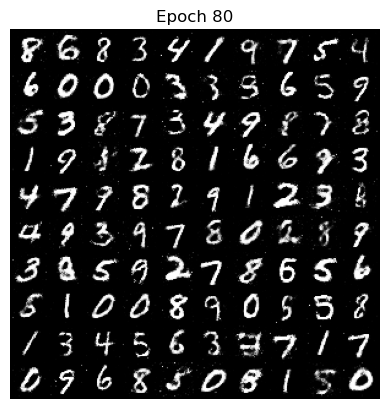

Epoch [81/200] | D Loss: 0.5698 | G Loss: 1.4669
Epoch [82/200] | D Loss: 0.5365 | G Loss: 1.1354
Epoch [83/200] | D Loss: 0.6175 | G Loss: 2.0592
Epoch [84/200] | D Loss: 0.5109 | G Loss: 1.5022
Epoch [85/200] | D Loss: 0.3974 | G Loss: 1.6191
Epoch [86/200] | D Loss: 0.6053 | G Loss: 1.2178
Epoch [87/200] | D Loss: 0.4745 | G Loss: 1.8635
Epoch [88/200] | D Loss: 0.4978 | G Loss: 1.2155
Epoch [89/200] | D Loss: 0.5560 | G Loss: 1.2761
Epoch [90/200] | D Loss: 0.5163 | G Loss: 1.2819


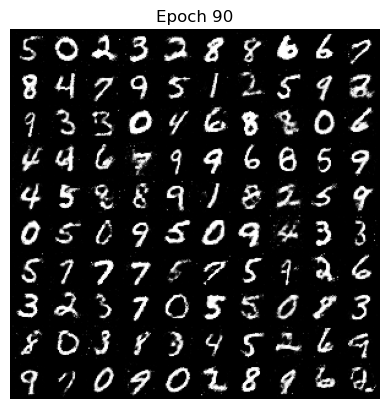

Epoch [91/200] | D Loss: 0.5392 | G Loss: 1.1165
Epoch [92/200] | D Loss: 0.5088 | G Loss: 1.1366
Epoch [93/200] | D Loss: 0.5161 | G Loss: 1.3557
Epoch [94/200] | D Loss: 0.6185 | G Loss: 1.0760
Epoch [95/200] | D Loss: 0.4496 | G Loss: 1.2380
Epoch [96/200] | D Loss: 0.5932 | G Loss: 1.4535
Epoch [97/200] | D Loss: 0.4263 | G Loss: 1.4025
Epoch [98/200] | D Loss: 0.4642 | G Loss: 1.5611
Epoch [99/200] | D Loss: 0.4575 | G Loss: 1.1267
Epoch [100/200] | D Loss: 0.6285 | G Loss: 1.0868


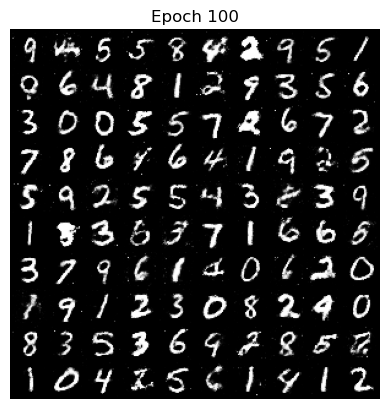

Epoch [101/200] | D Loss: 0.6434 | G Loss: 0.8576
Epoch [102/200] | D Loss: 0.6026 | G Loss: 0.8560
Epoch [103/200] | D Loss: 0.5272 | G Loss: 1.5685
Epoch [104/200] | D Loss: 0.5641 | G Loss: 1.5700
Epoch [105/200] | D Loss: 0.5317 | G Loss: 0.9343
Epoch [106/200] | D Loss: 0.5435 | G Loss: 1.2106
Epoch [107/200] | D Loss: 0.5572 | G Loss: 1.1275
Epoch [108/200] | D Loss: 0.5740 | G Loss: 1.0508
Epoch [109/200] | D Loss: 0.5359 | G Loss: 0.9996
Epoch [110/200] | D Loss: 0.4700 | G Loss: 1.2586


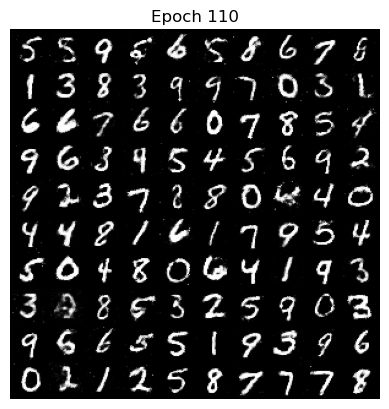

Epoch [111/200] | D Loss: 0.6688 | G Loss: 0.9960
Epoch [112/200] | D Loss: 0.4583 | G Loss: 1.3931
Epoch [113/200] | D Loss: 0.6239 | G Loss: 1.2194
Epoch [114/200] | D Loss: 0.4592 | G Loss: 1.5047
Epoch [115/200] | D Loss: 0.6484 | G Loss: 1.1892
Epoch [116/200] | D Loss: 0.5742 | G Loss: 0.9921
Epoch [117/200] | D Loss: 0.6120 | G Loss: 1.1862
Epoch [118/200] | D Loss: 0.4715 | G Loss: 1.1689
Epoch [119/200] | D Loss: 0.5949 | G Loss: 1.6728
Epoch [120/200] | D Loss: 0.6000 | G Loss: 1.3161


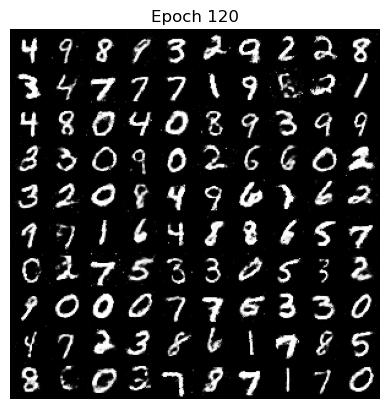

Epoch [121/200] | D Loss: 0.5217 | G Loss: 0.9691
Epoch [122/200] | D Loss: 0.5565 | G Loss: 1.0635
Epoch [123/200] | D Loss: 0.5729 | G Loss: 1.0435
Epoch [124/200] | D Loss: 0.4727 | G Loss: 1.7420
Epoch [125/200] | D Loss: 0.5724 | G Loss: 0.9639
Epoch [126/200] | D Loss: 0.5245 | G Loss: 1.4328
Epoch [127/200] | D Loss: 0.5360 | G Loss: 1.3489
Epoch [128/200] | D Loss: 0.4950 | G Loss: 1.0930
Epoch [129/200] | D Loss: 0.5621 | G Loss: 1.1204
Epoch [130/200] | D Loss: 0.5438 | G Loss: 1.0888


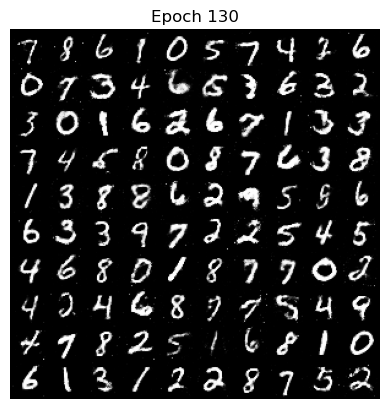

Epoch [131/200] | D Loss: 0.4417 | G Loss: 1.2716
Epoch [132/200] | D Loss: 0.5341 | G Loss: 1.3429
Epoch [133/200] | D Loss: 0.5090 | G Loss: 1.2565
Epoch [134/200] | D Loss: 0.5694 | G Loss: 1.0709
Epoch [135/200] | D Loss: 0.6164 | G Loss: 0.8736
Epoch [136/200] | D Loss: 0.6634 | G Loss: 1.3689
Epoch [137/200] | D Loss: 0.4996 | G Loss: 1.2593
Epoch [138/200] | D Loss: 0.6182 | G Loss: 0.6608
Epoch [139/200] | D Loss: 0.5857 | G Loss: 1.1051
Epoch [140/200] | D Loss: 0.5419 | G Loss: 1.3521


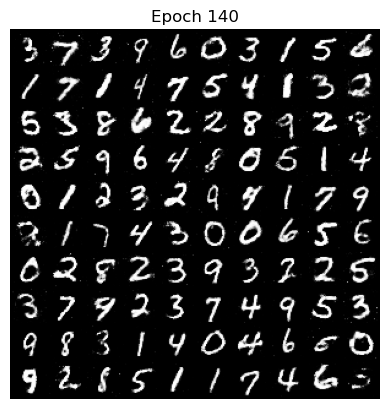

Epoch [141/200] | D Loss: 0.6060 | G Loss: 1.1459
Epoch [142/200] | D Loss: 0.4905 | G Loss: 1.0454
Epoch [143/200] | D Loss: 0.6576 | G Loss: 1.1404
Epoch [144/200] | D Loss: 0.5071 | G Loss: 1.1309
Epoch [145/200] | D Loss: 0.5720 | G Loss: 1.0086
Epoch [146/200] | D Loss: 0.5914 | G Loss: 0.9950
Epoch [147/200] | D Loss: 0.6588 | G Loss: 1.3025
Epoch [148/200] | D Loss: 0.5497 | G Loss: 1.0389
Epoch [149/200] | D Loss: 0.5717 | G Loss: 0.9684
Epoch [150/200] | D Loss: 0.5663 | G Loss: 1.3795


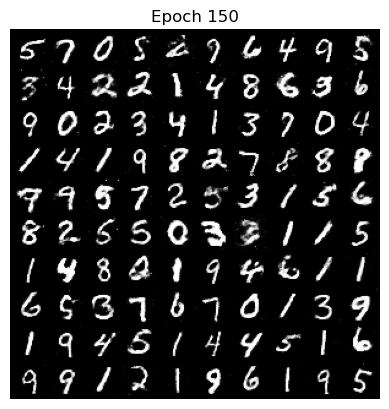

Epoch [151/200] | D Loss: 0.5433 | G Loss: 1.1439
Epoch [152/200] | D Loss: 0.5081 | G Loss: 1.2141
Epoch [153/200] | D Loss: 0.4836 | G Loss: 1.2377
Epoch [154/200] | D Loss: 0.5934 | G Loss: 1.3668
Epoch [155/200] | D Loss: 0.5222 | G Loss: 1.0557
Epoch [156/200] | D Loss: 0.4554 | G Loss: 1.1804
Epoch [157/200] | D Loss: 0.6209 | G Loss: 1.3172
Epoch [158/200] | D Loss: 0.5056 | G Loss: 1.2789
Epoch [159/200] | D Loss: 0.6290 | G Loss: 1.2454
Epoch [160/200] | D Loss: 0.5966 | G Loss: 1.2676


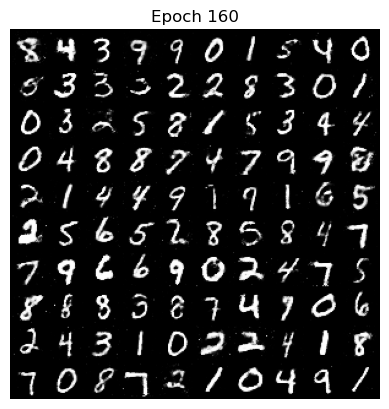

Epoch [161/200] | D Loss: 0.6242 | G Loss: 1.1839
Epoch [162/200] | D Loss: 0.6501 | G Loss: 1.1855
Epoch [163/200] | D Loss: 0.5023 | G Loss: 1.2843
Epoch [164/200] | D Loss: 0.5693 | G Loss: 1.2124
Epoch [165/200] | D Loss: 0.5555 | G Loss: 0.8435
Epoch [166/200] | D Loss: 0.5368 | G Loss: 1.0383
Epoch [167/200] | D Loss: 0.6084 | G Loss: 1.1160
Epoch [168/200] | D Loss: 0.4832 | G Loss: 1.4676
Epoch [169/200] | D Loss: 0.4639 | G Loss: 1.5909
Epoch [170/200] | D Loss: 0.5303 | G Loss: 1.0292


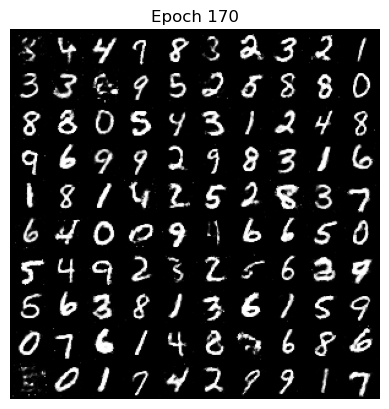

Epoch [171/200] | D Loss: 0.5641 | G Loss: 0.7633
Epoch [172/200] | D Loss: 0.5614 | G Loss: 1.1907
Epoch [173/200] | D Loss: 0.6463 | G Loss: 0.9206
Epoch [174/200] | D Loss: 0.4409 | G Loss: 1.1215
Epoch [175/200] | D Loss: 0.4518 | G Loss: 1.3147
Epoch [176/200] | D Loss: 0.5632 | G Loss: 1.7677
Epoch [177/200] | D Loss: 0.5160 | G Loss: 1.1850
Epoch [178/200] | D Loss: 0.5279 | G Loss: 1.0565
Epoch [179/200] | D Loss: 0.5840 | G Loss: 1.3185
Epoch [180/200] | D Loss: 0.5964 | G Loss: 0.9967


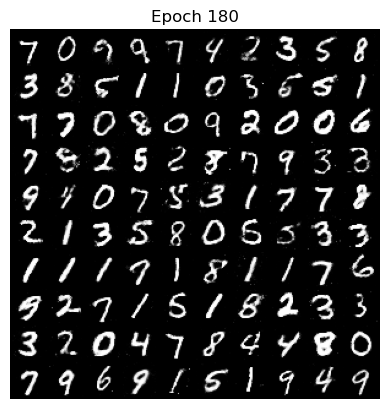

Epoch [181/200] | D Loss: 0.4620 | G Loss: 0.9203
Epoch [182/200] | D Loss: 0.6021 | G Loss: 0.9846
Epoch [183/200] | D Loss: 0.6002 | G Loss: 1.2971
Epoch [184/200] | D Loss: 0.5071 | G Loss: 1.3428
Epoch [185/200] | D Loss: 0.4693 | G Loss: 1.4841
Epoch [186/200] | D Loss: 0.5621 | G Loss: 1.1504
Epoch [187/200] | D Loss: 0.5663 | G Loss: 1.3927
Epoch [188/200] | D Loss: 0.4035 | G Loss: 1.4442
Epoch [189/200] | D Loss: 0.5512 | G Loss: 0.8685
Epoch [190/200] | D Loss: 0.5941 | G Loss: 0.8832


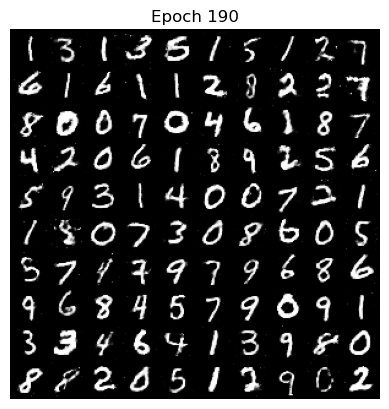

Epoch [191/200] | D Loss: 0.4039 | G Loss: 1.7900
Epoch [192/200] | D Loss: 0.5054 | G Loss: 1.0088
Epoch [193/200] | D Loss: 0.4819 | G Loss: 1.3465
Epoch [194/200] | D Loss: 0.6212 | G Loss: 0.8896
Epoch [195/200] | D Loss: 0.5958 | G Loss: 0.9719
Epoch [196/200] | D Loss: 0.4539 | G Loss: 1.0899
Epoch [197/200] | D Loss: 0.5530 | G Loss: 1.2491
Epoch [198/200] | D Loss: 0.4631 | G Loss: 1.2349
Epoch [199/200] | D Loss: 0.4936 | G Loss: 1.2940


In [9]:
d_losses = []
g_losses = []

for epoch in range(num_epochs):
    for i, (imgs, labels) in enumerate(dataloader):
        imgs.to(device)
        batch_size = imgs.size(0)
        
        # 레이블을 원-핫 인코딩
        labels_onehot = torch.zeros(batch_size, num_classes).to(device)
        labels_onehot[range(batch_size), labels] = 1

        # 진짜 이미지와 레이블
        real_imgs = imgs.view(batch_size, -1).to(device)
        real_labels = torch.ones(batch_size, 1).to(device)

        # 생성기 훈련
        noise = torch.randn(batch_size, latent_dim).to(device)
        fake_labels = torch.randint(0, num_classes, (batch_size,)).to(device)
        fake_labels_onehot = torch.zeros(batch_size, num_classes).to(device)
        fake_labels_onehot[range(batch_size), fake_labels] = 1

        gen_imgs = generator(noise, fake_labels_onehot)
        g_loss = criterion(discriminator(gen_imgs, fake_labels_onehot), real_labels)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        # 판별기 훈련
        real_loss = criterion(discriminator(real_imgs, labels_onehot), real_labels)
        fake_loss = criterion(discriminator(gen_imgs.detach(), fake_labels_onehot), torch.zeros(batch_size, 1).to(device))
        d_loss = (real_loss + fake_loss) / 2

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()
    
    d_losses.append(d_loss.item())
    g_losses.append(g_loss.item())

    print(f"Epoch [{epoch}/{num_epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")
    
    if epoch % 10 == 0:
        save_generated_images(generator, epoch, real_imgs, latent_dim, num_classes, device)

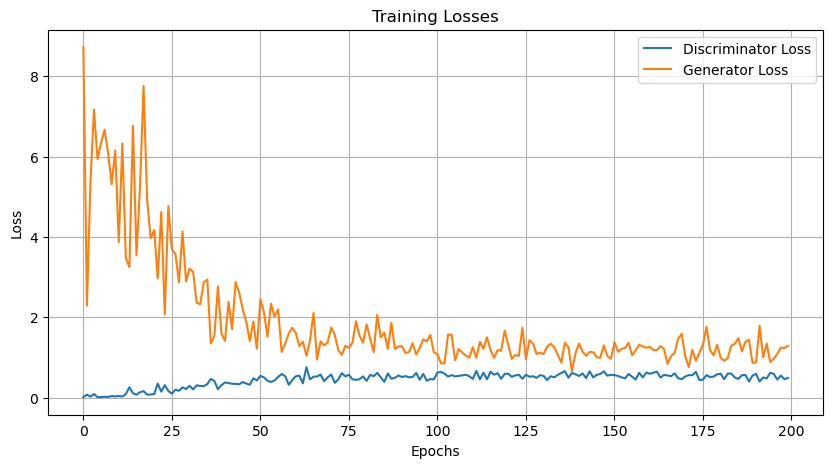

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.title('Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

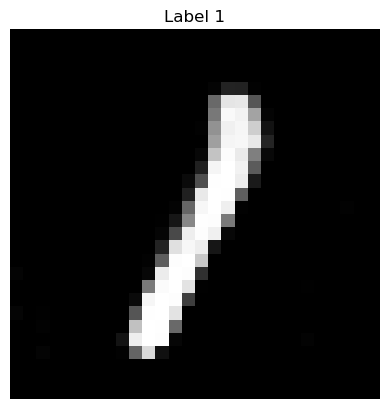

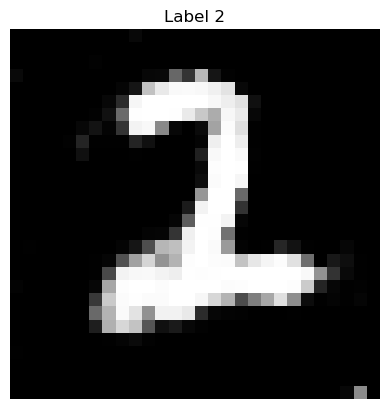

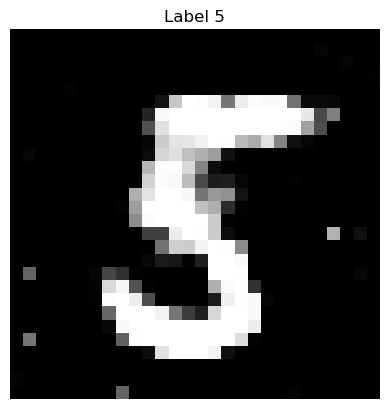

In [13]:
def save_generated_image(generator, latent_dim, num_classes, device, label):
    # 주어진 레이블에 대한 원-핫 인코딩 생성
    labels_onehot = torch.zeros(1, num_classes).to(device)
    labels_onehot[0, label] = 1  # 특정 레이블에 대해 1로 설정

    # 노이즈 생성
    noise = torch.randn(1, latent_dim).to(device)

    # 생성된 이미지
    gen_img = generator(noise, labels_onehot).view(1, 1, 28, 28).detach().cpu()

    # 이미지 시각화
    plt.imshow(gen_img[0][0], cmap='gray')
    plt.title(f'Label {label}')
    plt.axis('off')
    plt.show()

save_generated_image(generator, latent_dim, num_classes, device, label=1)
save_generated_image(generator, latent_dim, num_classes, device, label=2)
save_generated_image(generator, latent_dim, num_classes, device, label=5)
